### Map about accidents on pedestrian crossings in Helsinki area 2018

The data about the accidents is from Tilastokeskus "Tieliikenneonnettomuudet 2018" dataset. 
https://etsin.fairdata.fi/dataset/047c2358-64fe-43ff-82e2-65db8865806f 

And the Helsinki municipality borders is from NLS.
https://etsin.fairdata.fi/dataset/d4a1a8ba-7fc2-4f84-ba3d-6dbaeeacca89

In [87]:
# Import essential modules
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
import folium

# Filepaths
hel_fp = r"data/Helsinki_kunta.shp"

# Reading files
hel = gpd.read_file(hel_fp)

In [88]:
# Checking CRS'
print(hel.crs)

epsg:3067


In [89]:
# Reprojectin CRS to Web Mercator
hel = hel.to_crs(epsg=4326)
print(hel.crs)

epsg:4326


In [90]:
onnet = pd.read_csv('hel_onnet.csv', usecols=[0,1,3,4,12,13])

In [91]:
from shapely.geometry import Point
# Create an empty column for the DataFrame where the values will be stored
col_name = 'geometry'
onnet[col_name] = None

# Iterate over the rows
for i, row in onnet.iterrows():
    coord = Point(row['x'], row['y'])
    
    # Updating geometry column
    onnet.loc[i, col_name] = coord

In [92]:
geometry = [Point(xy) for xy in zip(onnet.x, onnet.y)]
accid = onnet.drop(['x', 'y'], axis=1)
onnet_gpd = gpd.GeoDataFrame(accid, crs="EPSG:3067", geometry=geometry)

In [93]:
onnet_gpd.head()

,vvonn,kkonn,vakav,onntyyppi,geometry
0,2018,3,2,6,POINT (391839.580 6675817.580)
1,2018,3,3,6,POINT (393863.270 6681521.580)
2,2018,6,2,6,POINT (384051.630 6673969.640)
3,2018,8,2,6,POINT (387147.380 6674537.020)
4,2018,11,2,6,POINT (381048.420 6671297.970)


In [94]:
# Reprojectin CRS to Web Mercator
onnet_gpd = onnet_gpd.to_crs(epsg=4326)

print(onnet_gpd.crs)

epsg:4326


<AxesSubplot:>

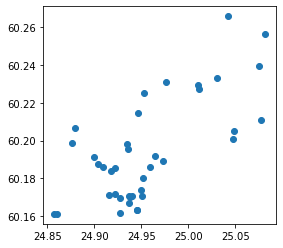

In [95]:
onnet_gpd.plot()

In [96]:
# Convert points to GeoJSON
accid_gjson = folium.features.GeoJson(onnet_gpd, name="Accidents on pedestrian crossings")

# Convert municipality border to GeoJSON
hel_gjson = folium.features.GeoJson(hel, name="Helsinki's borders")

#### Let's create the map!

In [97]:
# Create a Map instance
m = folium.Map(location=[60.22, 25.0], tiles='OpenStreetMap', zoom_start=11, control_scale=True)

# Add accidents and borders to the map instance
accid_gjson.add_to(m)

hel_gjson.add_to(m)


# Create a layer control object and add it to our map instance
folium.LayerControl().add_to(m)

m

In [98]:
# Get x and y coordinates for each point
onnet_gpd["x"] = onnet_gpd["geometry"].apply(lambda geom: geom.x)
onnet_gpd["y"] = onnet_gpd["geometry"].apply(lambda geom: geom.y)

# Create a list of coordinate pairs
locations = list(zip(onnet_gpd["y"], onnet_gpd["x"]))

In [99]:
locations

[(60.20479368185045, 25.048602727247957),
 (60.256512869770745, 25.08210008934344),
 (60.18607141249178, 24.90925593593081),
 (60.192030845532656, 24.964720564813327),
 (60.16123461642783, 24.85670958894835),
 (60.161447008802284, 24.859918542457223),
 (60.21072289158014, 25.07775849072292),
 (60.17005154447551, 24.93848213786041),
 (60.195447325401425, 24.935932948950576),
 (60.171497742175156, 24.921808435644273),
 (60.23959845894639, 25.074809196555893),
 (60.17142287007266, 24.916206210413822),
 (60.20659132787729, 24.879473551201325),
 (60.18414195374364, 24.917812366671026),
 (60.16683382507225, 24.936969054995018),
 (60.20096955105626, 25.047533289295107),
 (60.23102169192537, 24.976696103854156),
 (60.22942405518146, 25.010520112127917),
 (60.1873721564554, 24.904498873793287),
 (60.17086261550351, 24.937443233230223),
 (60.21464101725098, 24.94699827131126),
 (60.19114066504644, 24.90012307909133),
 (60.16347419459694, 24.945122875119765),
 (60.22520088010161, 24.9529291089212

In [108]:
from folium.plugins import MarkerCluster

# Creating a map instance
m = folium.Map(location=[60.20, 25.0], tiles='stamentoner', zoom_start=11.5, control_scale=True)

# Create a folium marker cluster
marker_cluster = MarkerCluster(locations)

# Add marker cluster to map
marker_cluster.add_to(m)


# Show heatmap
m

In [101]:
# Saving the map as HTML file
outfp = r"docs/accidents_map.html"
m.save(outfp)